# Prediction of Rice Husk Ash Compressive Strength

## Loading the dataset

In [1]:
import pandas as pd

df = pd.read_excel("C:/Users/USER/Documents/ML spreadsheet.xlsx")
df.head ()

,W/B ratio,% Addition,Cement,RHA,MIX RATIO,Density of Concrete,Fine Agg.,Coarse Agg.,Water,SiO2,Al2O3,Fe2O3,CaO,LoI,Curing Age,Compressive strength,Super plasticizer,Reference Link
0,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,7,22.29,NaN,https://www.academia.edu/23438256/Compressive_...
1,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,14,28.24,NaN,https://www.academia.edu/23438256/Compressive_...
2,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,21,32.10,NaN,https://www.academia.edu/23438256/Compressive_...
3,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,28,37.70,NaN,https://www.academia.edu/23438256/Compressive_...
4,0.45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.66,0.32,0.55,0.81,5.81,7,20.50,NaN,https://www.academia.edu/23438256/Compressive_...


## Importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

## Initial Data ExploratIon and Data Cleaning 

In [3]:
#checking the first 5 rows to see how the dataset looks like

df.head()

,W/B ratio,% Addition,Cement,RHA,MIX RATIO,Density of Concrete,Fine Agg.,Coarse Agg.,Water,SiO2,Al2O3,Fe2O3,CaO,LoI,Curing Age,Compressive strength,Super plasticizer,Reference Link
0,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,7,22.29,NaN,https://www.academia.edu/23438256/Compressive_...
1,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,14,28.24,NaN,https://www.academia.edu/23438256/Compressive_...
2,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,21,32.10,NaN,https://www.academia.edu/23438256/Compressive_...
3,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,28,37.70,NaN,https://www.academia.edu/23438256/Compressive_...
4,0.45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.66,0.32,0.55,0.81,5.81,7,20.50,NaN,https://www.academia.edu/23438256/Compressive_...


In [4]:
#Checking the number of rows and columns

rows, cols = df.shape
print("This data has {} rows and {} columns".format(rows, cols))

This data has 1094 rows and 18 columns


In [5]:
df.dtypes

W/B ratio               float64
% Addition              float64
Cement                  float64
RHA                     float64
MIX RATIO                object
Density of Concrete     float64
Fine Agg.               float64
Coarse Agg.             float64
Water                   float64
SiO2                    float64
Al2O3                   float64
Fe2O3                   float64
CaO                     float64
LoI                     float64
Curing Age                int64
Compressive strength    float64
Super plasticizer       float64
Reference Link           object
dtype: object

In [6]:
df.columns

Index(['W/B ratio', '% Addition', 'Cement', 'RHA', 'MIX RATIO',
       'Density of Concrete', 'Fine Agg.', 'Coarse Agg.', 'Water', 'SiO2',
       'Al2O3', 'Fe2O3', 'CaO', 'LoI', 'Curing Age', 'Compressive strength',
       'Super plasticizer', 'Reference Link'],
      dtype='object')

### Renaming the columns

In [7]:
#Renaming columns method

df = df.rename(columns={'W/B ratio': 'w/b_ratio', 'Density of Concrete':'concrete_density', 'Fine Agg.':'fine_agg', 'Coarse Agg.':'coarse_agg', 'Cement':'cement','% Addition':'percentage_addition', 'Compressive strength': 'compressive_strength', 'Curing Age':'curing_age', 'Super plasticizer':'super_plasticizer' })

In [8]:
df.head()

,w/b_ratio,percentage_addition,cement,RHA,MIX RATIO,concrete_density,fine_agg,coarse_agg,Water,SiO2,Al2O3,Fe2O3,CaO,LoI,curing_age,compressive_strength,super_plasticizer,Reference Link
0,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,7,22.29,NaN,https://www.academia.edu/23438256/Compressive_...
1,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,14,28.24,NaN,https://www.academia.edu/23438256/Compressive_...
2,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,21,32.10,NaN,https://www.academia.edu/23438256/Compressive_...
3,0.45,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22.44,7.55,3.29,58.61,1.73,28,37.70,NaN,https://www.academia.edu/23438256/Compressive_...
4,0.45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.66,0.32,0.55,0.81,5.81,7,20.50,NaN,https://www.academia.edu/23438256/Compressive_...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   w/b_ratio             997 non-null    float64
 1   percentage_addition   1094 non-null   float64
 2   cement                790 non-null    float64
 3   RHA                   554 non-null    float64
 4   MIX RATIO             8 non-null      object 
 5   concrete_density      407 non-null    float64
 6   fine_agg              504 non-null    float64
 7   coarse_agg            528 non-null    float64
 8   Water                 574 non-null    float64
 9   SiO2                  754 non-null    float64
 10  Al2O3                 703 non-null    float64
 11  Fe2O3                 754 non-null    float64
 12  CaO                   754 non-null    float64
 13  LoI                   673 non-null    float64
 14  curing_age            1094 non-null   int64  
 15  compressive_strength 

In [10]:
#Changing the types of data for Fe2O3 to float

df['Fe2O3'] = df['Fe2O3'].astype(float)

In [11]:
#Changing the types of data for Fe2O3 to float

df['cement'] = df['cement'].astype(float)

### Dropping Irrelevant Columns

In [12]:
#Dropping the Concrete density, mix ration and Reference link columns

df = df.drop(['concrete_density', 'MIX RATIO', 'Reference Link'], axis = 1)

In [13]:
df.columns

Index(['w/b_ratio', 'percentage_addition', 'cement', 'RHA', 'fine_agg',
       'coarse_agg', 'Water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'LoI',
       'curing_age', 'compressive_strength', 'super_plasticizer'],
      dtype='object')

In [14]:
#Showing the percentage of null values

for col in df.columns:
    pct_na = np.mean(df[col].isna())
    print('{} has {}% NA values'.format(col, pct_na))

w/b_ratio has 0.0886654478976234% NA values
percentage_addition has 0.0% NA values
cement has 0.27787934186471663% NA values
RHA has 0.4936014625228519% NA values
fine_agg has 0.5393053016453382% NA values
coarse_agg has 0.5173674588665448% NA values
Water has 0.4753199268738574% NA values
SiO2 has 0.31078610603290674% NA values
Al2O3 has 0.35740402193784276% NA values
Fe2O3 has 0.31078610603290674% NA values
CaO has 0.31078610603290674% NA values
LoI has 0.38482632541133455% NA values
curing_age has 0.0% NA values
compressive_strength has 0.0% NA values
super_plasticizer has 0.1563071297989031% NA values


In [15]:
# Removing rows with empty values

df.dropna(subset=['fine_agg', 'SiO2','Water'], inplace=True)
df.shape

(458, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 130 to 1093
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   w/b_ratio             458 non-null    float64
 1   percentage_addition   458 non-null    float64
 2   cement                458 non-null    float64
 3   RHA                   458 non-null    float64
 4   fine_agg              458 non-null    float64
 5   coarse_agg            458 non-null    float64
 6   Water                 458 non-null    float64
 7   SiO2                  458 non-null    float64
 8   Al2O3                 458 non-null    float64
 9   Fe2O3                 458 non-null    float64
 10  CaO                   458 non-null    float64
 11  LoI                   458 non-null    float64
 12  curing_age            458 non-null    int64  
 13  compressive_strength  458 non-null    float64
 14  super_plasticizer     458 non-null    float64
dtypes: float64(14), int64(1)


## Exploratory Data Analysis

In [17]:
#checking the number of duplicates
sum(df.duplicated())

1

In [18]:
# Dropping the duplicated rows
df = df.drop_duplicates()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
w/b_ratio,457.0,0.455842,0.127377,0.240000,0.330000,0.500000,0.550000,0.700000
percentage_addition,457.0,13.560175,10.096964,0.000000,5.000000,10.000000,20.000000,50.000000
cement,457.0,363.239972,78.047250,186.560909,304.940000,346.820809,405.000000,571.000000
RHA,457.0,51.982354,44.836849,0.000000,15.470000,46.242775,75.000000,198.000000
fine_agg,457.0,572.696847,180.885308,0.000000,517.919075,602.372727,685.714286,945.000000
coarse_agg,457.0,1194.914057,215.220369,688.000000,1052.000000,1204.745455,1371.428571,1625.371429
Water,457.0,179.583300,39.267490,107.098473,150.000000,180.600000,207.000000,269.407636
SiO2,457.0,71.960197,23.558678,19.160000,62.300000,82.840000,89.000000,96.200000
Al2O3,457.0,4.659322,6.566698,0.000000,0.260000,1.280000,5.100000,21.280000
Fe2O3,457.0,2.578293,3.556084,0.100000,0.570000,0.950000,3.660000,21.280000


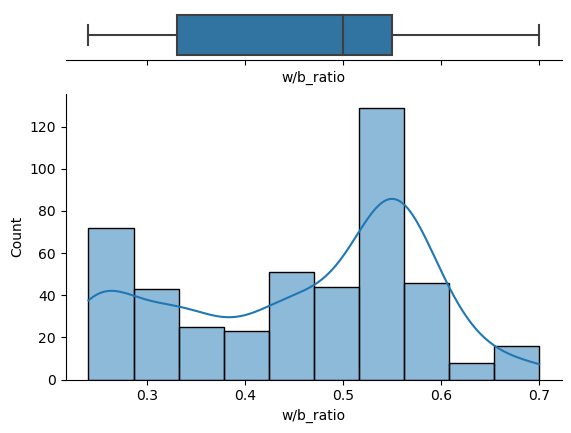

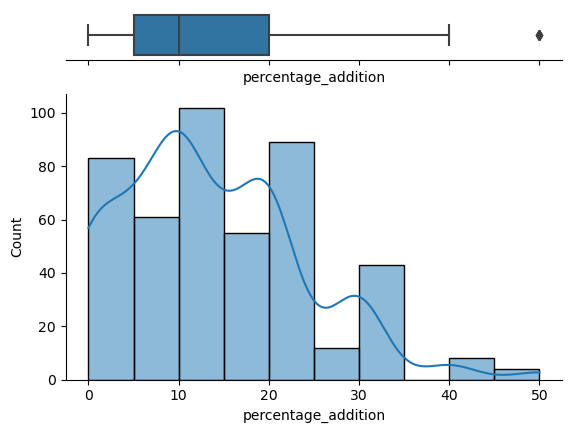

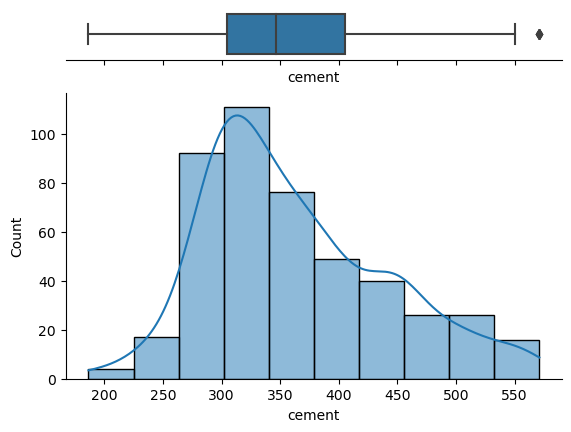

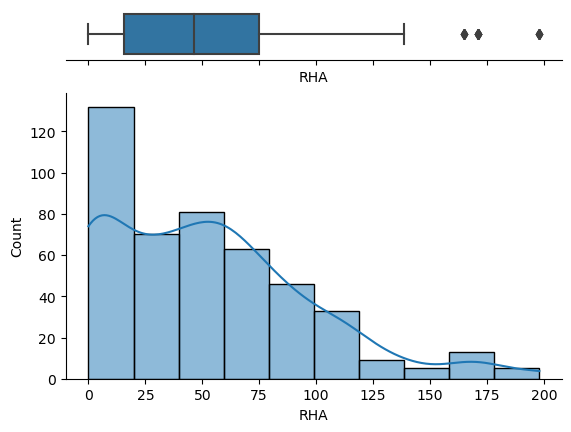

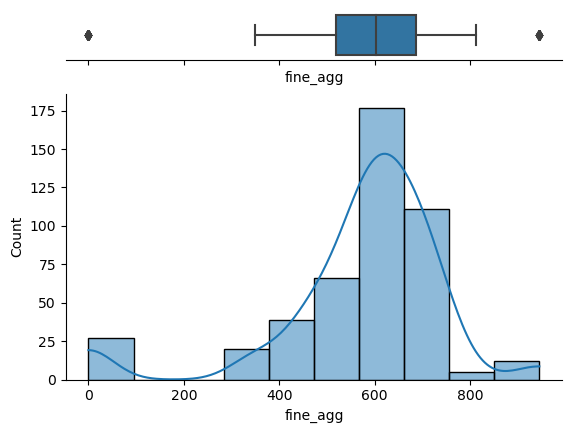

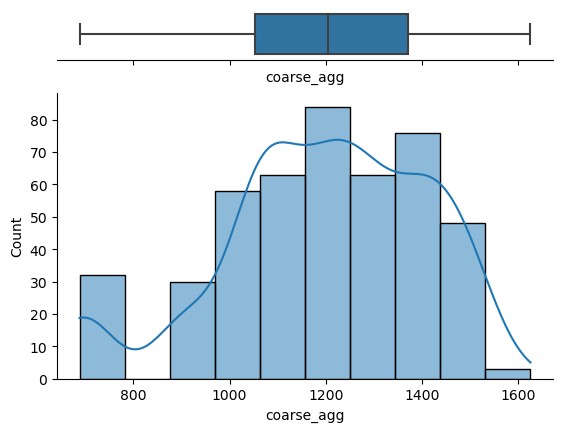

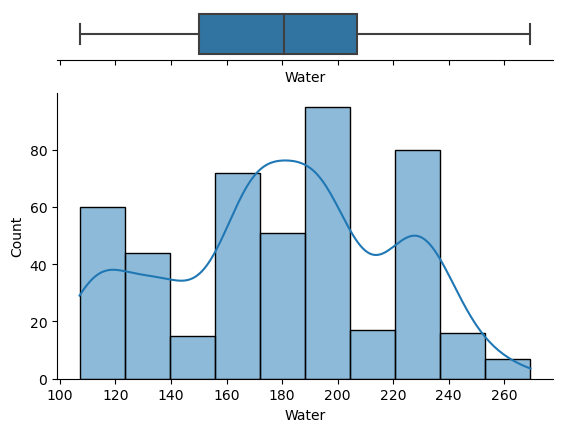

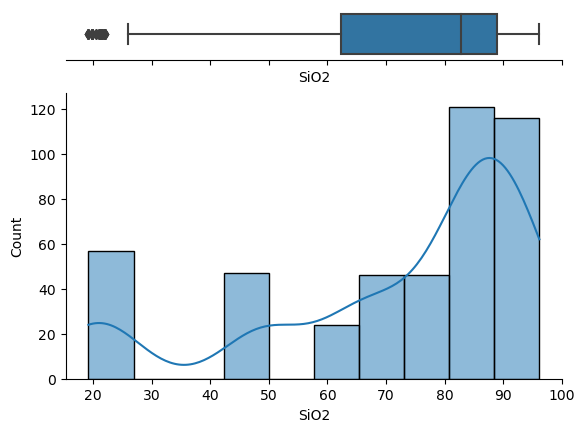

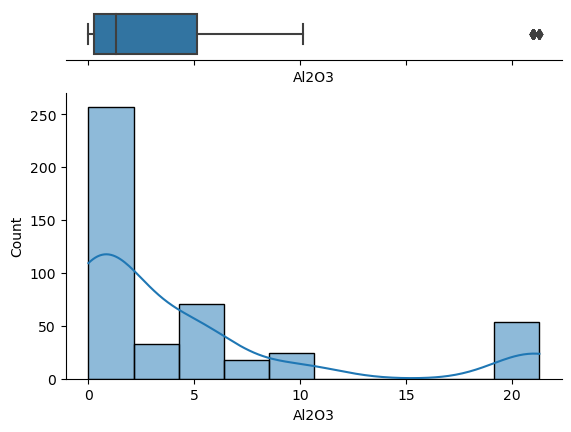

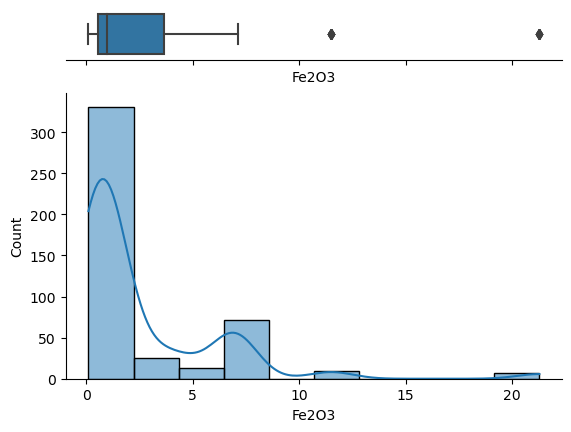

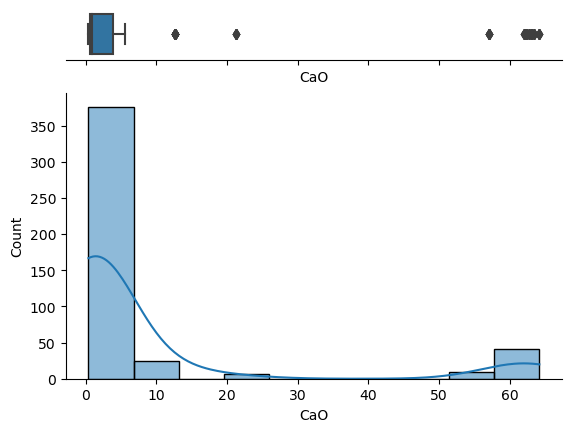

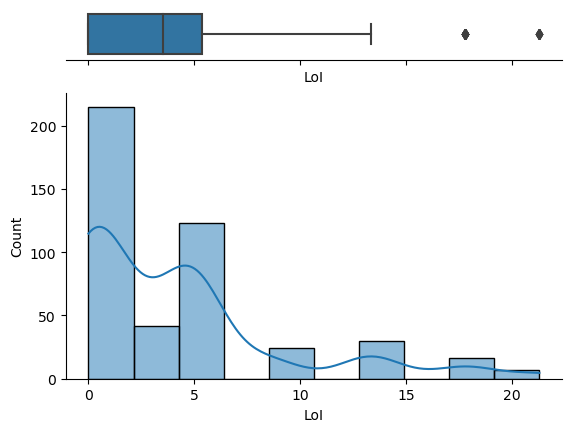

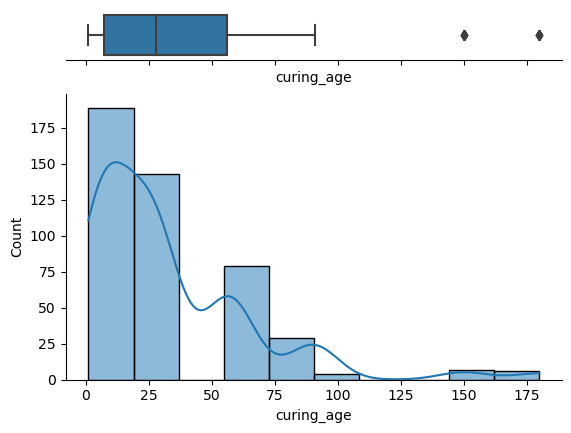

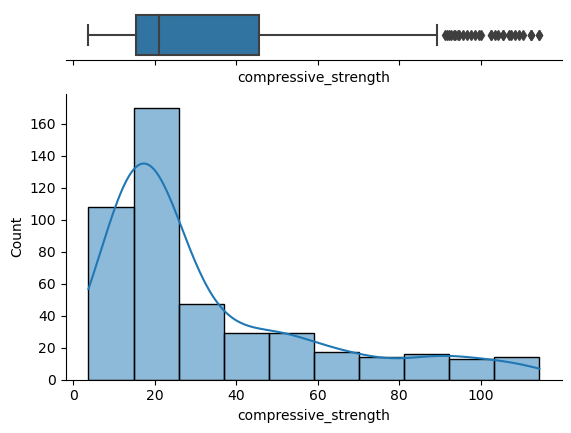

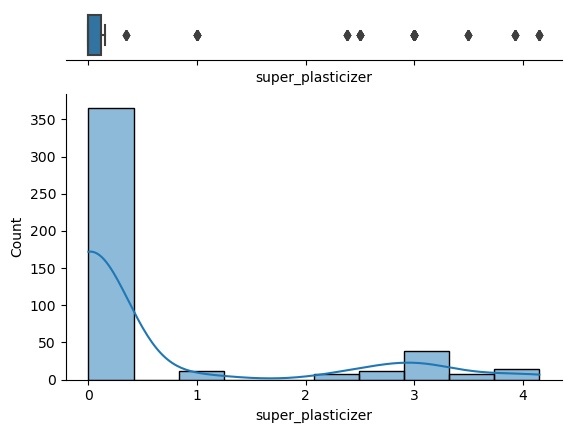

In [20]:
for column in df:
    # Create subplots with 2 rows (for boxplot and histogram), sharing the x-axis
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Create a histogram using Seaborn and place it in the 'ax_hist' subplot and boxplot in 'ax_box'
    sns.boxplot(data = df, x=column, ax=ax_box)
    sns.histplot(data = df, x=column, bins=10, kde=True, ax=ax_hist)

    ax_box.set(yticks=[]) # Remove y-axis ticks from the boxplot subplot
    
    sns.despine(ax=ax_hist)  # Remove top spine from the histogram subplot
    
    sns.despine(ax=ax_box, left=True) # Remove left spine from the boxplot subplot
    

### Checking the Relatonships

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


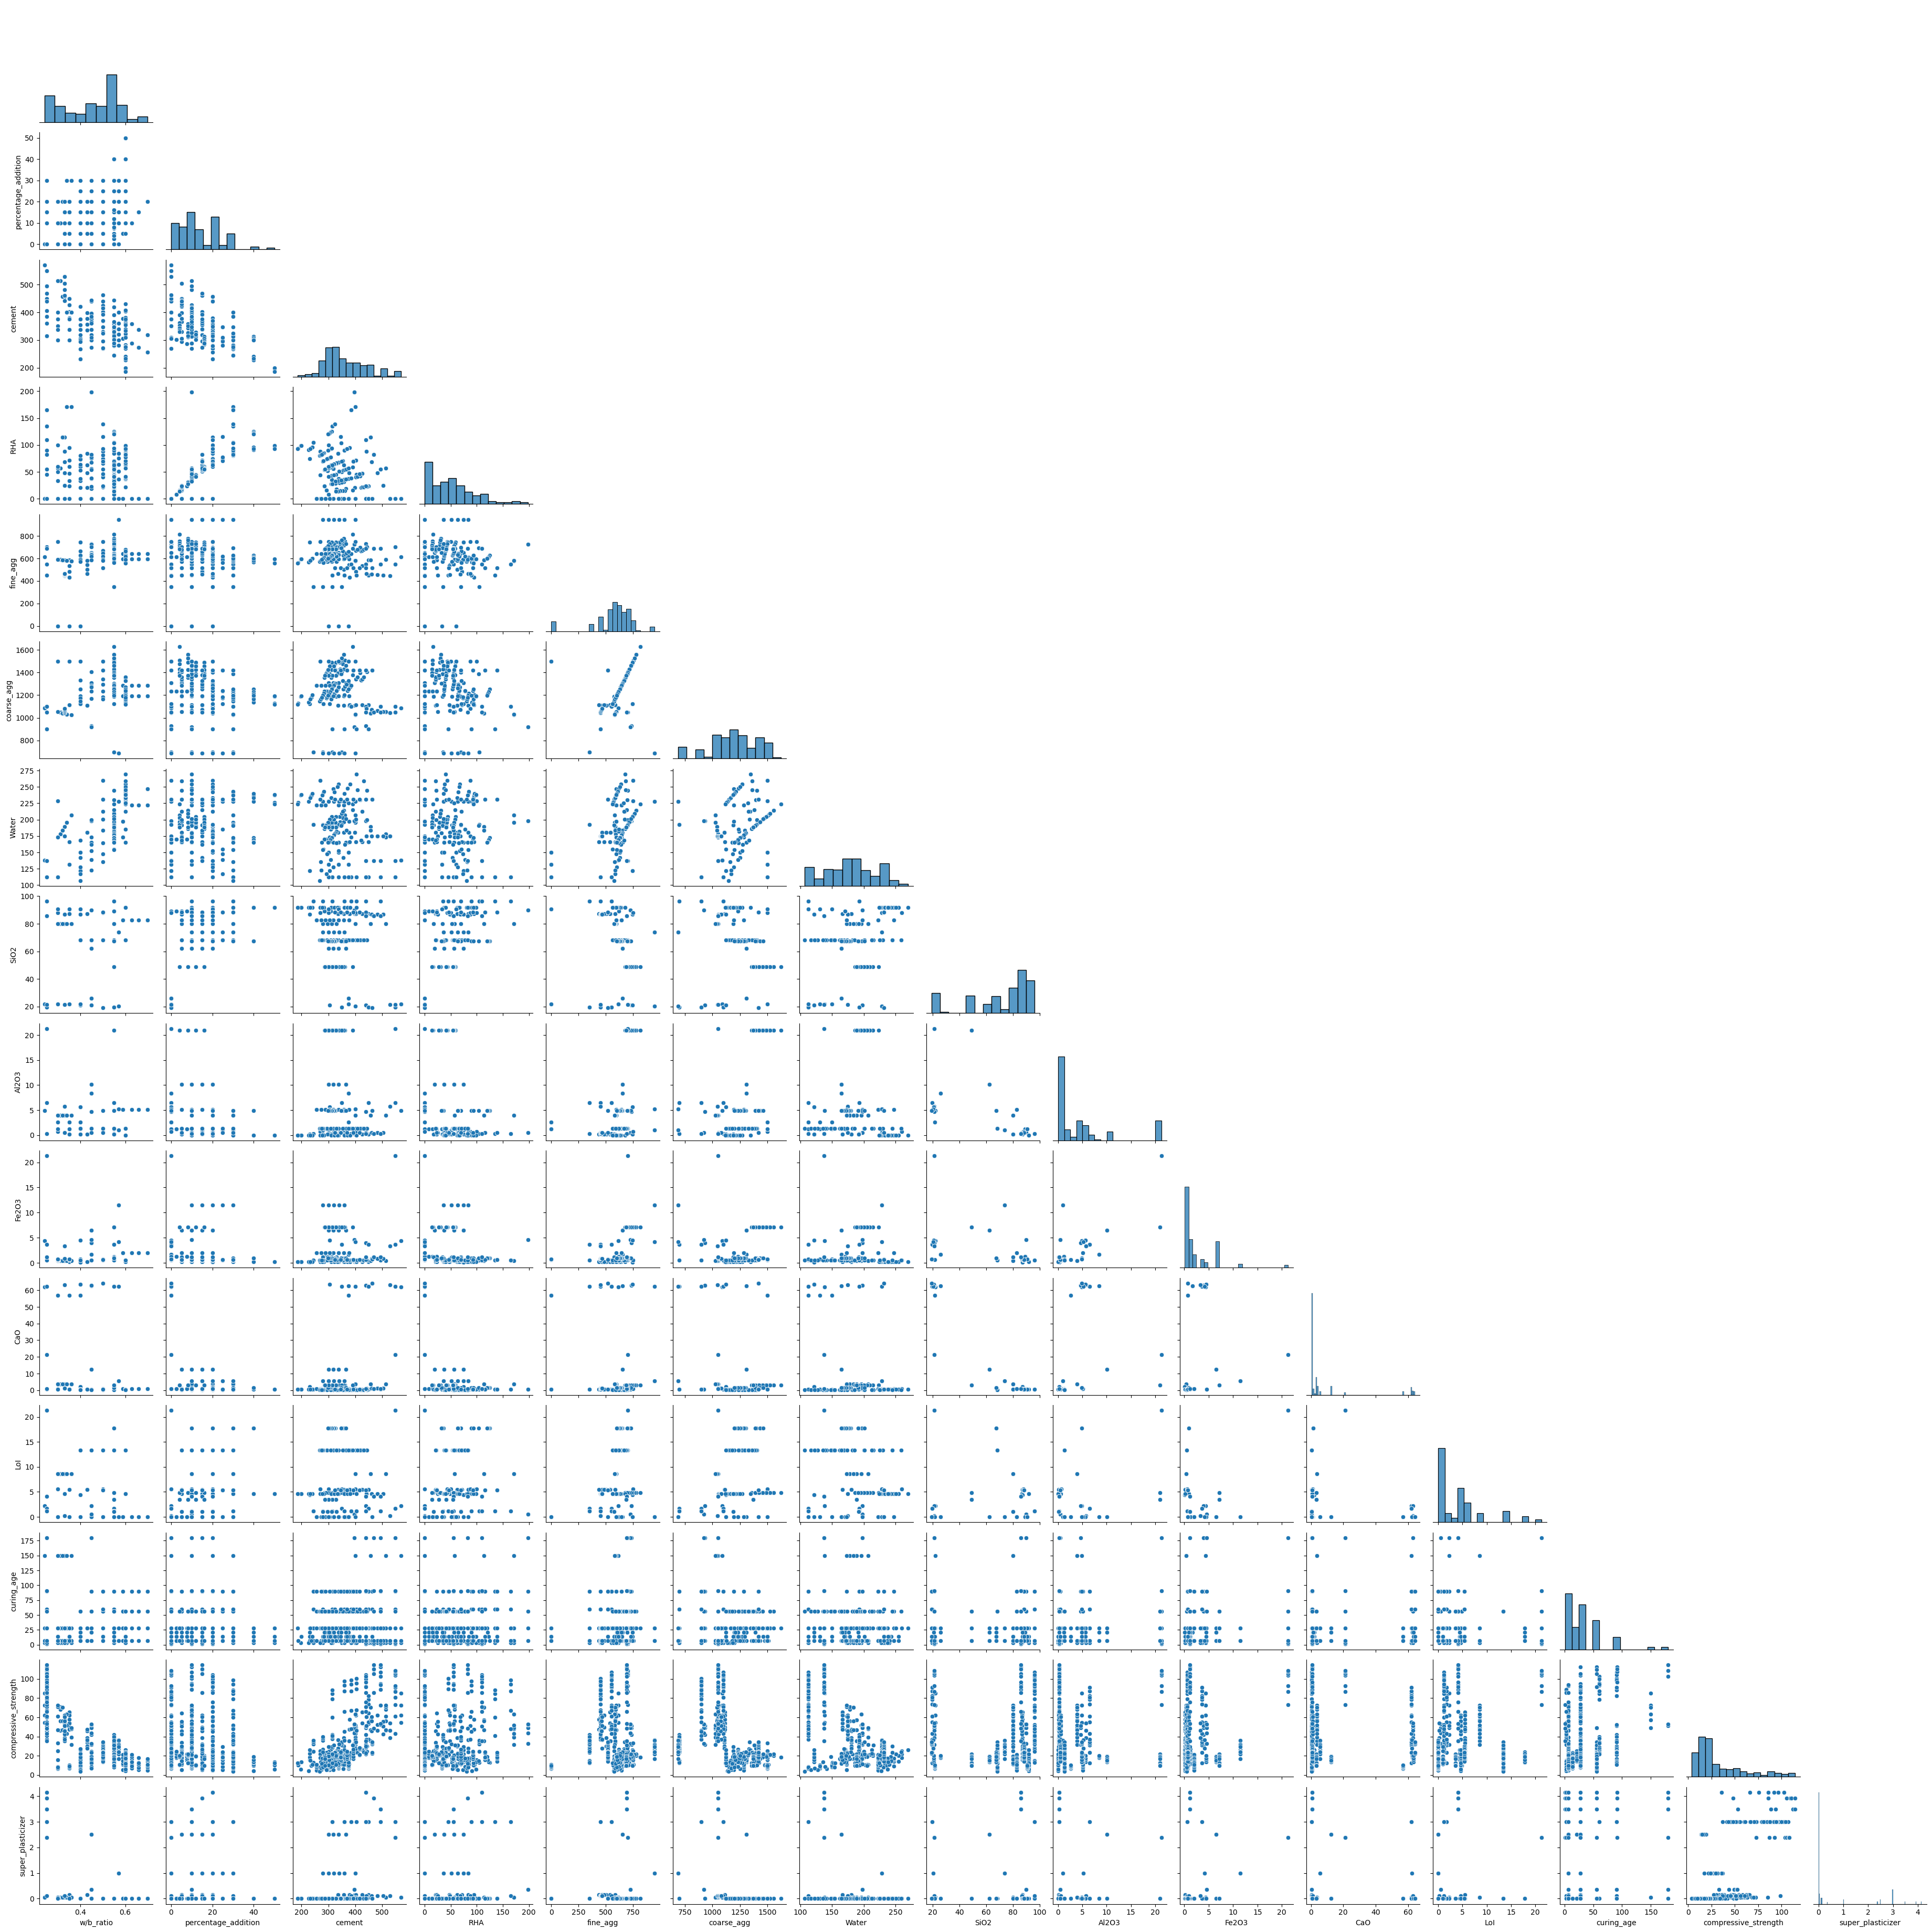

In [21]:
sns.pairplot(data=df, corner=True)
plt.show()

from this plot, we notice that;

    There's a linear relationship between RHA and percentage addition
    Linear relationship also between cement and compressive strength
    The discrete ages that compressive strength tests were performed


Because of the discrete ages, a violin/box plot is more useful in vizualizing the relationship.



<Axes: title={'center': 'curing_age vs. compressive_strength'}, xlabel='curing_age', ylabel='compressive_strength'>

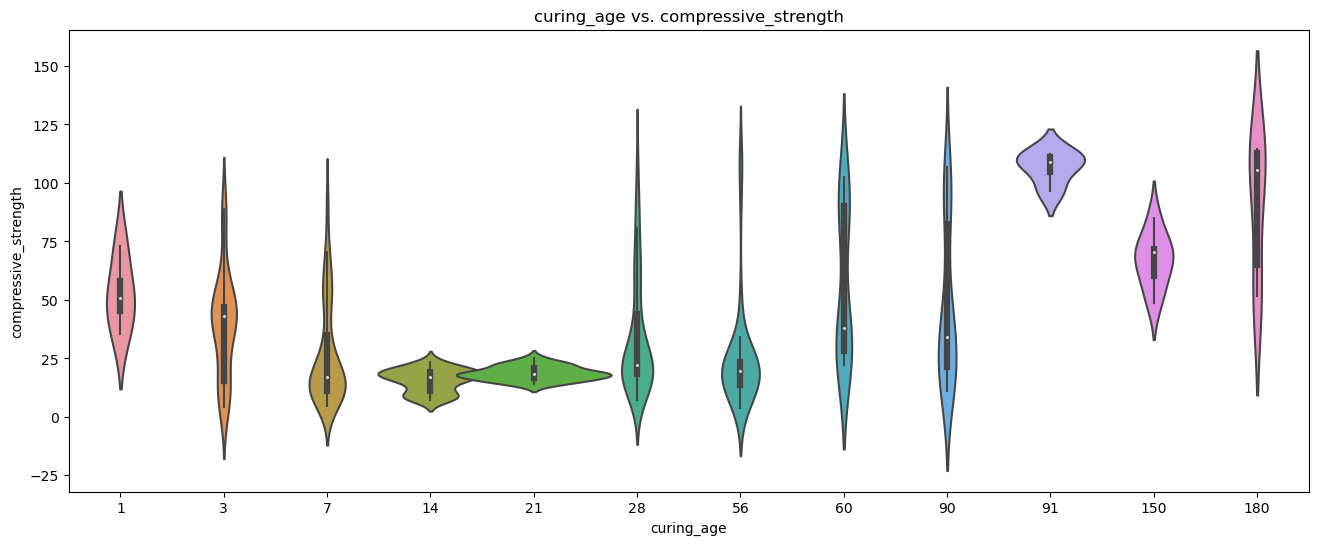

In [22]:
#Using a violin plot in vizualizing the relationship between the curing age and compressive strength.

plt.figure(figsize=(16, 6), label='curing_age vs. compressive_strength')
plt.title('curing_age vs. compressive_strength')
sns.violinplot(data=df, x="curing_age", y="compressive_strength", width=1.5, )

In [23]:
# This Correlation Matrix shows the Pearson Correlation between all variables in our datase

df.corr()

,w/b_ratio,percentage_addition,cement,RHA,fine_agg,coarse_agg,Water,SiO2,Al2O3,Fe2O3,CaO,LoI,curing_age,compressive_strength,super_plasticizer
w/b_ratio,1.000000,0.097353,-0.671028,-0.252436,0.278861,0.227731,0.747760,0.045177,0.181862,0.046388,-0.216993,-0.050872,-0.072817,-0.737280,-0.632684
percentage_addition,0.097353,1.000000,-0.428193,0.771014,-0.006236,-0.116295,0.129023,0.500289,-0.262639,-0.269665,-0.497115,0.227862,-0.007481,-0.079070,0.006121
cement,-0.671028,-0.428193,1.000000,-0.077285,0.012125,-0.186588,-0.262704,-0.264319,-0.030141,0.099776,0.344639,0.202212,0.169335,0.707790,0.424393
RHA,-0.252436,0.771014,-0.077285,1.000000,0.014206,-0.209578,-0.032635,0.477640,-0.289622,-0.250461,-0.426810,0.212202,0.077098,0.226181,0.178183
fine_agg,0.278861,-0.006236,0.012125,0.014206,1.000000,-0.133305,0.340867,-0.117054,0.318088,0.413392,-0.128374,0.227851,0.095411,0.087378,0.099521
coarse_agg,0.227731,-0.116295,-0.186588,-0.209578,-0.133305,1.000000,0.179213,-0.106991,0.330508,-0.040815,-0.127260,0.097691,-0.091128,-0.489908,-0.352216
Water,0.747760,0.129023,-0.262704,-0.032635,0.340867,0.179213,1.000000,0.104618,0.063589,0.008934,-0.197259,0.056481,0.000412,-0.459746,-0.556574
SiO2,0.045177,0.500289,-0.264319,0.477640,-0.117054,-0.106991,0.104618,1.000000,-0.596682,-0.529454,-0.825465,-0.111493,-0.029165,0.047450,0.040323
Al2O3,0.181862,-0.262639,-0.030141,-0.289622,0.318088,0.330508,0.063589,-0.596682,1.000000,0.729652,0.134759,0.128832,0.003944,-0.144015,-0.086111
Fe2O3,0.046388,-0.269665,0.099776,-0.250461,0.413392,-0.040815,0.008934,-0.529454,0.729652,1.000000,0.181964,0.111453,0.008027,0.057636,0.133571


Text(0.5, 1.0, "Pearson's Correlation Heatmap")

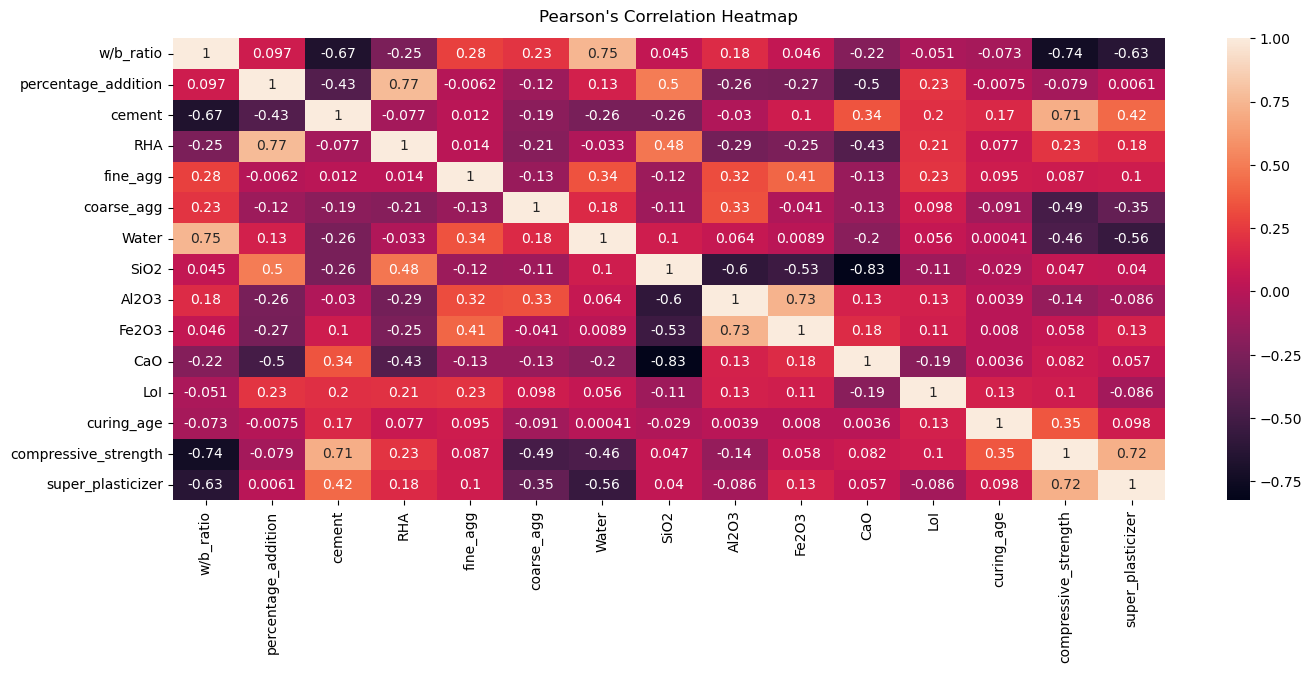

In [24]:
#Pearson Heatmap

plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Pearson's Correlation Heatmap", fontdict={'fontsize':12}, pad=12)    

Most of the relationship were strong (greater than 0.5) with negative 0.83 being the highest between SiO2 and CaO.



### Relationship between all features and the target variable

In [25]:
# Let's check the pearson's correlation between all input features and the target variable

correlations = []
for col in df.columns.drop('compressive_strength'):
    val = scipy.stats.pearsonr(df[col],df.compressive_strength)[0]
    correlations.append({
        'Feature':col,
        'Correlation with Strength':val
    })
    
pd.DataFrame(correlations).sort_values('Correlation with Strength', ascending=False)
    
    

,Feature,Correlation with Strength
13,super_plasticizer,0.717950
2,cement,0.707790
12,curing_age,0.353608
3,RHA,0.226181
11,LoI,0.104573
4,fine_agg,0.087378
10,CaO,0.082199
9,Fe2O3,0.057636
7,SiO2,0.047450
1,percentage_addition,-0.079070


In [26]:
df.columns

Index(['w/b_ratio', 'percentage_addition', 'cement', 'RHA', 'fine_agg',
       'coarse_agg', 'Water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'LoI',
       'curing_age', 'compressive_strength', 'super_plasticizer'],
      dtype='object')

## Data Preparation for Training

In [27]:
# Importing the necessary Librares

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [28]:
#defining the input and target varables

input_columns =df.columns.drop('compressive_strength')
inputs = df[input_columns]
targets = df['compressive_strength']

In [29]:
inputs

,w/b_ratio,percentage_addition,cement,RHA,fine_agg,coarse_agg,Water,SiO2,Al2O3,Fe2O3,CaO,LoI,curing_age,super_plasticizer
130,0.45,0.0,375.000000,0.000000,650.000000,1310.000000,165.000000,25.9,8.40,1.70,62.70,0.0,7,0.0
131,0.45,0.0,375.000000,0.000000,650.000000,1310.000000,165.000000,25.9,8.40,1.70,62.70,0.0,21,0.0
132,0.45,0.0,375.000000,0.000000,650.000000,1310.000000,165.000000,25.9,8.40,1.70,62.70,0.0,28,0.0
133,0.45,5.0,365.250000,18.750000,650.000000,1310.000000,165.000000,62.3,10.11,6.48,12.56,0.0,7,0.0
134,0.45,5.0,365.250000,18.750000,650.000000,1310.000000,165.000000,62.3,10.11,6.48,12.56,0.0,21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.55,12.0,301.714286,41.142857,685.714286,1371.428571,188.571429,49.0,21.00,7.13,3.20,3.5,28,0.0
1090,0.55,12.0,301.714286,41.142857,685.714286,1371.428571,188.571429,49.0,21.00,7.13,3.20,3.5,56,0.0
1091,0.55,16.0,288.000000,54.857143,685.714286,1371.428571,188.571429,49.0,21.00,7.13,3.20,3.5,7,0.0
1092,0.55,16.0,288.000000,54.857143,685.714286,1371.428571,188.571429,49.0,21.00,7.13,3.20,3.5,28,0.0


In [30]:
targets

130     17.747
131     18.988
132     20.160
133     16.657
134     18.368
         ...  
1089    19.560
1090    19.620
1091     9.970
1092    18.740
1093    17.110
Name: compressive_strength, Length: 457, dtype: float64

### Splitting the data into Train, Test and Validation Data

In [31]:
# Splitting data into train (70%), test (20%) and Validation(10%)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, random_state=23)

# Further splitting the train data into train (70%) and validation (30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [32]:
# Min/Max Scaling of numeric features

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## Training the Model

In [33]:
# The models to be used are Ridge Regression, Decision Trees, Random Forest and CatBoost

models = {
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'CATBoost': CatBoostRegressor(silent=True)
}

results = {'Model': [], 'Mean RMSE': [], 'Mean R2': []}

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define your k-fold

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    cv_mean_rmse = np.sqrt(-scores.mean())
    
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")
    cv_r2_mean = np.mean(r2_scores)
    
    results['Model'].append(model_name)
    results['Mean RMSE'].append(cv_mean_rmse)
    results['Mean R2'].append(cv_r2_mean)

results_df = pd.DataFrame(results).sort_values('Mean R2', ascending=False)
print(results_df)

              Model  Mean RMSE   Mean R2
3          CATBoost   5.704121  0.947519
2     Random Forest   6.616039  0.926026
1     Decision Tree   8.901774  0.842451
0  Ridge Regression  10.694202  0.815063


The best performing model is CATBoost therefore we will tune its parameters to further enhance its performance

### Hyperparameter tuning for CATBoost

In [34]:
# Define a helper function to use K-fold CV to test hyperparameters
def TestCatBoostParams(**params):
    score = cross_val_score(CatBoostRegressor(**params, thread_count=-1, random_state=23, verbose=False), X_train, y_train, 
            cv= kf, scoring="r2")
    
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))

    

### Optimizing estimators

In [35]:
#Optimizing the estimators

estimators = [1,2,4,8,16,32,64,128,256]
for n in estimators:
    TestCatBoostParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is 0.3619
Mean R-squared from K-fold CV with {'n_estimators': 2} is 0.6801
Mean R-squared from K-fold CV with {'n_estimators': 4} is 0.8497
Mean R-squared from K-fold CV with {'n_estimators': 8} is 0.9168
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.9419
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.9458
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.9491
Mean R-squared from K-fold CV with {'n_estimators': 128} is 0.9473
Mean R-squared from K-fold CV with {'n_estimators': 256} is 0.949


In [36]:
estimators = [50,51,52,53,54,55,56,57,58,59,60] 
for n in estimators:    
    TestCatBoostParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 50} is 0.9382
Mean R-squared from K-fold CV with {'n_estimators': 51} is 0.9426
Mean R-squared from K-fold CV with {'n_estimators': 52} is 0.9461
Mean R-squared from K-fold CV with {'n_estimators': 53} is 0.9463
Mean R-squared from K-fold CV with {'n_estimators': 54} is 0.9446
Mean R-squared from K-fold CV with {'n_estimators': 55} is 0.9467
Mean R-squared from K-fold CV with {'n_estimators': 56} is 0.9438
Mean R-squared from K-fold CV with {'n_estimators': 57} is 0.944
Mean R-squared from K-fold CV with {'n_estimators': 58} is 0.945
Mean R-squared from K-fold CV with {'n_estimators': 59} is 0.9435
Mean R-squared from K-fold CV with {'n_estimators': 60} is 0.9428


In [37]:
#optimizing estimators

estimators = [127, 128, 129, 130, 131, 132, 133]
for n in estimators:
    TestCatBoostParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 127} is 0.9461
Mean R-squared from K-fold CV with {'n_estimators': 128} is 0.9473
Mean R-squared from K-fold CV with {'n_estimators': 129} is 0.9463
Mean R-squared from K-fold CV with {'n_estimators': 130} is 0.9471
Mean R-squared from K-fold CV with {'n_estimators': 131} is 0.9456
Mean R-squared from K-fold CV with {'n_estimators': 132} is 0.9443
Mean R-squared from K-fold CV with {'n_estimators': 133} is 0.9446


### Optimzing Max_depth

In [38]:
#optimizing the max_depth

depths = [1, 2, 4, 8, 10]
for n in depths:
    TestCatBoostParams(n_estimators = 128, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 1} is 0.9004
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 2} is 0.9304
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4} is 0.9518
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 8} is 0.9377
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 10} is 0.909


In [39]:
depths =[3, 4, 5, 6, 7]
for n in depths:
    TestCatBoostParams(n_estimators = 128, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 3} is 0.9451
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4} is 0.9518
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 5} is 0.9481
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 6} is 0.9473
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 7} is 0.9363


### Optimizing Learning_rate

In [40]:
#optimizing the learning_rate

rates =[.2, .3, .4]
for n in rates:
    TestCatBoostParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.2} is 0.9466
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.9506
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.4} is 0.9462


In [41]:
rates =[.3, .30025, .3005]
for n in rates:
    TestCatBoostParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.9506
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.30025} is 0.9489
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3005} is 0.9484


## Training CatBoostRegressor with Optimized Hyperparameters

In [42]:
model = CatBoostRegressor(n_estimators = 128, max_depth = 4, thread_count=-1, 
                learning_rate = .3, random_state = 23, verbose=False)

model.fit(X_train, y_train)

In [43]:
model.fit(X_train, y_train)

### Using the Model to Make Predictions on our Test set

We now put our model to use to predict the strengths in the test dataset and get some corresponding scores to see how well it performed.

In [44]:
preds = model.predict(X_test)
r_squared = r2_score(y_test, preds)
MSE = mean_squared_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
MAE = mean_absolute_error(y_test, preds)

print('Our Optimized CatBoostRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized CatBoostRegressor got the following scores on the test set:
R-squared: 0.9856864671559422
MSE: 11.705070949968047
RMSE: 3.4212674478865353
MAE: 2.3648074787483493


## R-squared of .9857

We can be quite pleased with this result as this can be interpreted as: 

Our model can account for 98.57% of the variance in the data.

mean actual value :32.338964188408696
mean predicted value :32.14374869023668
Difference between the actual and the predicted:0.1952154981720139


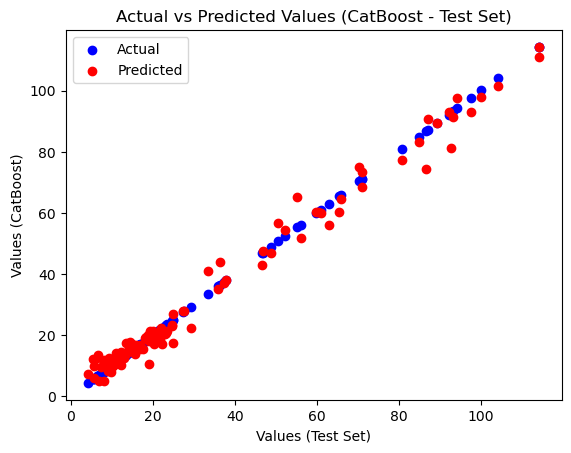

In [51]:

y_test_pred = model.predict(X_test)


coefficients = np.polyfit(y_test,y_test_pred,1)
line_of_best_fit = np.polyval(coefficients,y_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_results['Difference'] = df_results['Actual'] - df_results['Predicted']
actual_mean = df_results['Actual'].mean()
predicted_mean = df_results['Predicted'].mean()
difference = df_results['Difference'].mean()

print(f'mean actual value :{actual_mean}')
print(f'mean predicted value :{predicted_mean}')
print(f'Difference between the actual and the predicted:{difference}')

plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_test_pred, color='red', label='Predicted')
plt.xlabel('Values (Test Set)')
plt.ylabel('Values (CatBoost)')
plt.title('Actual vs Predicted Values (CatBoost - Test Set)')
plt.legend()
plt.show()

### Feature Importances

Here we get a look at how much each input variable factored in to our final model.

In [45]:
# Create a dataframe showing the feature importances

importances = pd.DataFrame({
    'Feature': inputs.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
0,w/b_ratio,47.436767
12,curing_age,18.680413
5,coarse_agg,14.271111
2,cement,9.900366
11,LoI,1.625905
13,super_plasticizer,1.589617
9,Fe2O3,1.516946
10,CaO,1.376139
4,fine_agg,0.947765
1,percentage_addition,0.893511


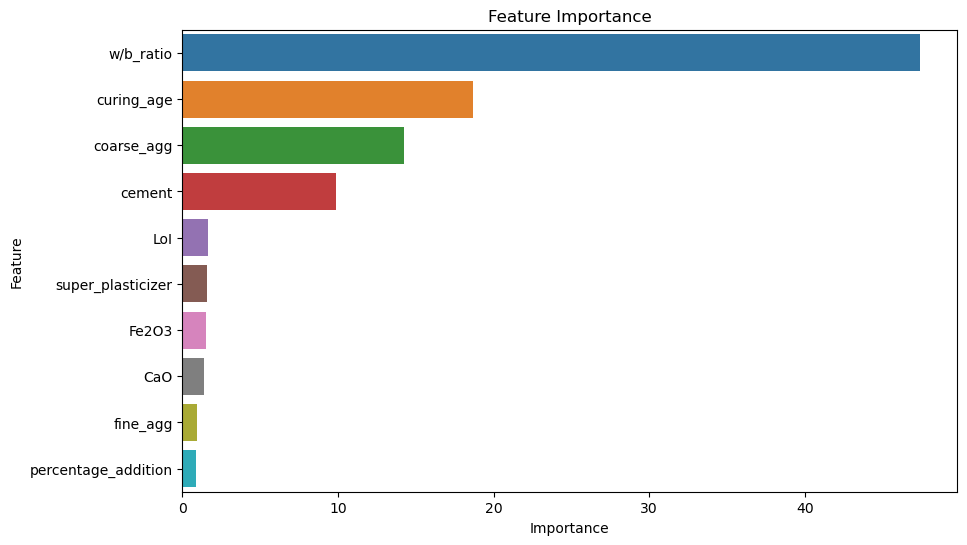

In [46]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');

### Using shapley to also check for the feature importance

In [47]:
import shap

In [48]:
# Using 'model' as trained model and 'inputs' as feature data

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(inputs)

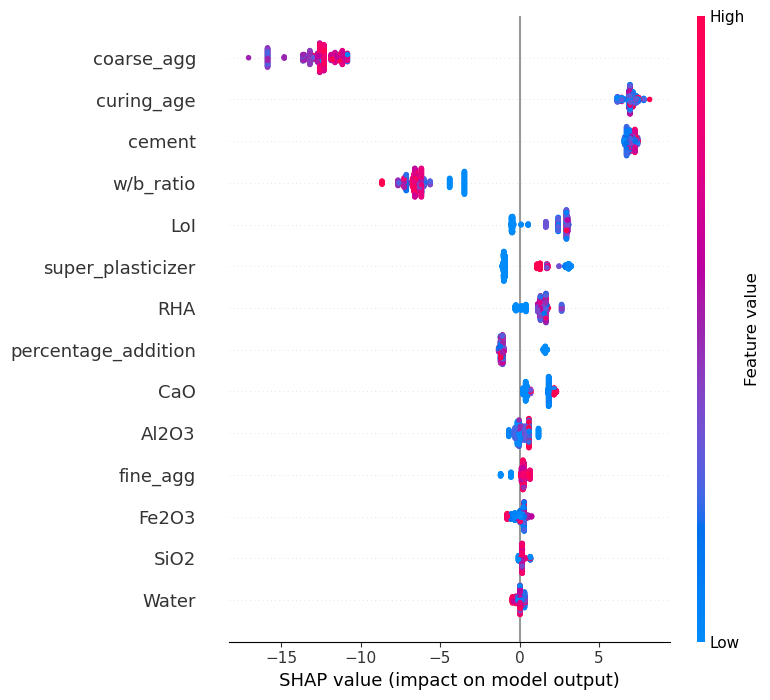

In [49]:
# Create a summary plot
shap.summary_plot(shap_values, inputs, feature_names=inputs.columns, show=False)
plt.show()

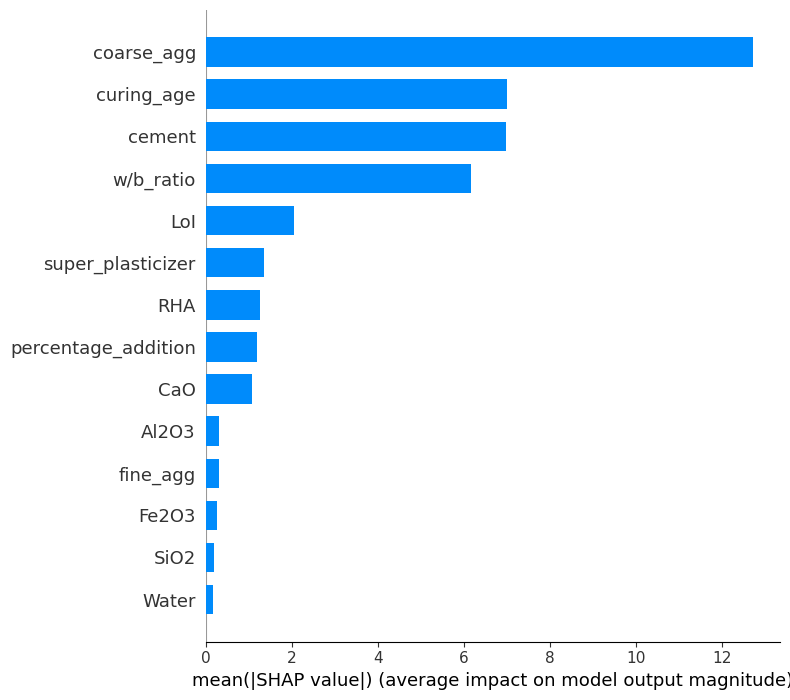

In [50]:
# Create a summary plot with a histogram

shap.summary_plot(shap_values, inputs, plot_type='bar', feature_names=inputs.columns, show=False)
plt.show()